In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Breast Cancer Wisconsin

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
cancer = pd.read_csv("data.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#drop unneccassary columns
cancer.drop("Unnamed: 32",axis=1,inplace=True)
cancer.drop("id",axis=1,inplace=True)
cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
#Map diagnosis column to an integer so Malignant is a 1 and benign as 0
cancer["diagnosis"]=cancer["diagnosis"].map({'M':1,'B':0})
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#divide into means, standard error, and worst catagories
features_mean=list(cancer.columns[1:11])
features_se=list(cancer.columns[11:20])
features_worst=list(cancer.columns[21:31])

print("Mean Columns:")
print("--------------")
print(features_mean)
print("--------------")
print("Standard Error Columns:")
print("--------------")
print(features_se)
print("--------------")
print("Worst(Largest) Columns:")
print("--------------")
print(features_worst)
print("--------------")


Mean Columns:
--------------
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
--------------
Standard Error Columns:
--------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
--------------
Worst(Largest) Columns:
--------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
--------------


## 1 Data Visualization

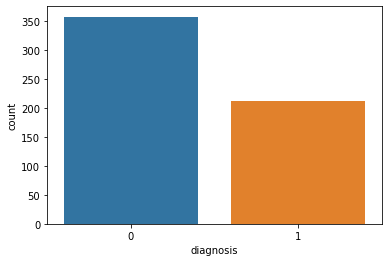

In [7]:
import seaborn as sns

sns.countplot(x=cancer["diagnosis"],label="count")

plt.savefig("./images/diagnosis_count.png")
plt.show()

The aren't equal values of the targets and could have effect on future results.

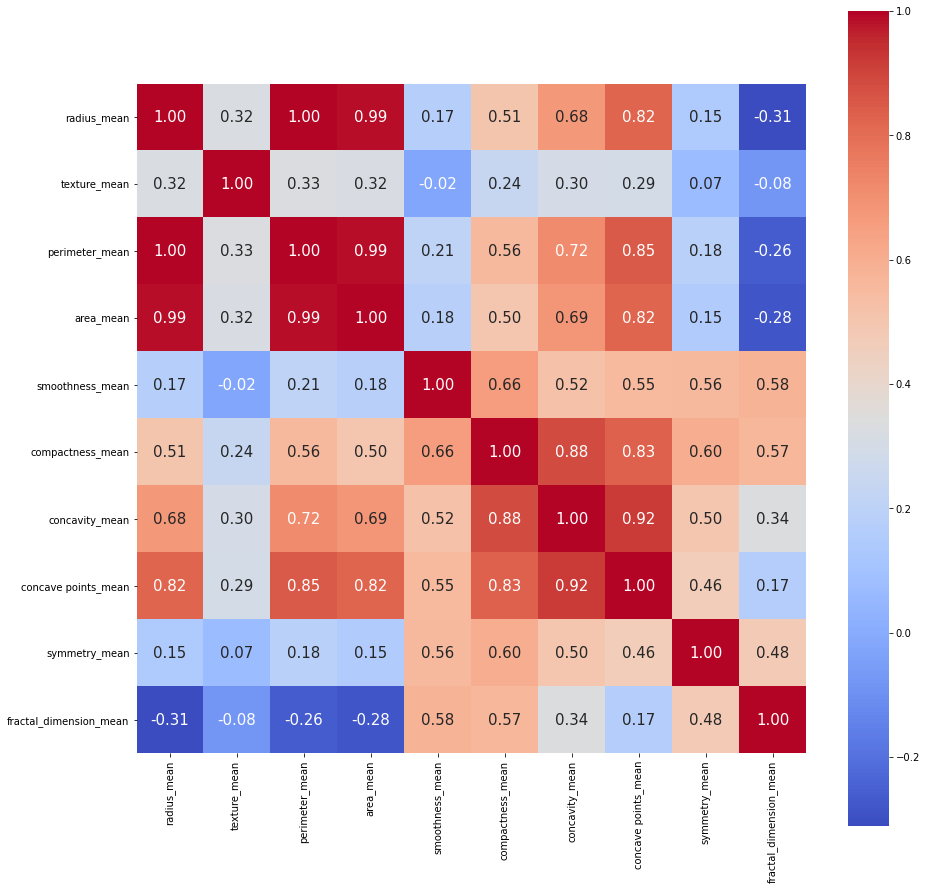

In [8]:
corr=cancer[features_mean].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True, square=True, annot = True, fmt = ".2f",\
            annot_kws={'size':15}, xticklabels = features_mean,\
            yticklabels = features_mean, cmap = "coolwarm")
plt.savefig("./images/corr_mean.png")
plt.show()

### Observations:

- radius_mean,perimeter_mean, and area_mean are all highly correleated and only one should be used as a feature. 

- compactness_mean, concavity_mean, concavepoint_mean are highly correlated.  

- The selected parameters going forward will be texture, perimeter, smoothness, compactness, symmetry, and fractal dimension

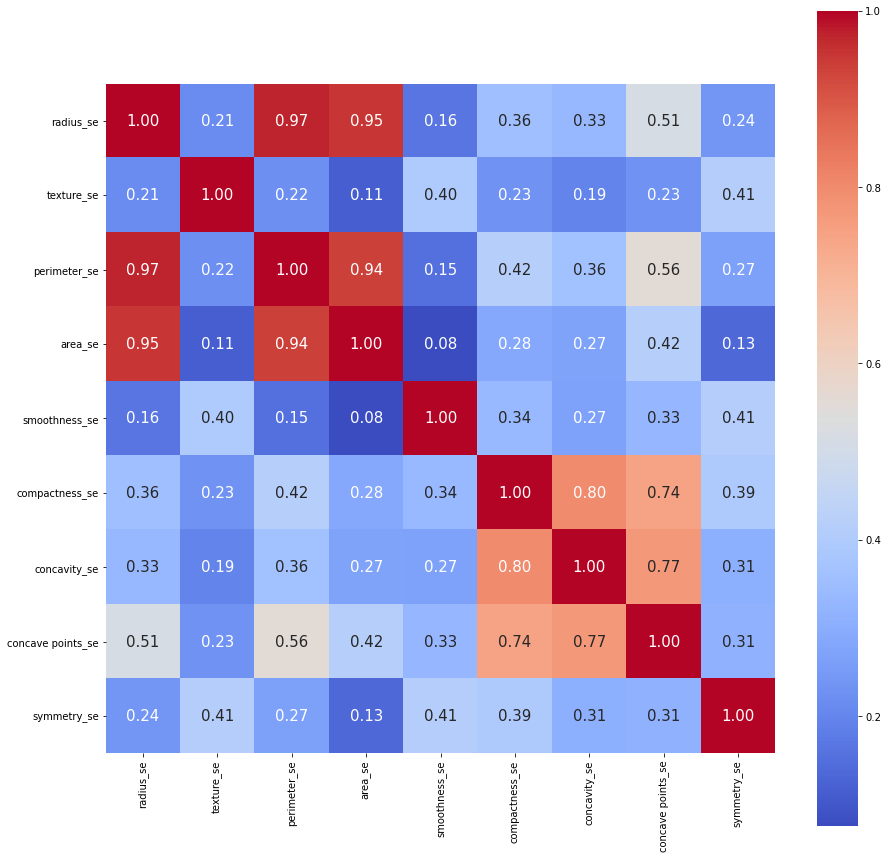

In [9]:
corr=cancer[features_se].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True, square=True, annot = True, fmt = ".2f",\
            annot_kws={'size':15}, xticklabels = features_se,\
            yticklabels = features_se, cmap = "coolwarm")
plt.savefig("./images/corr_se.png")
plt.show()

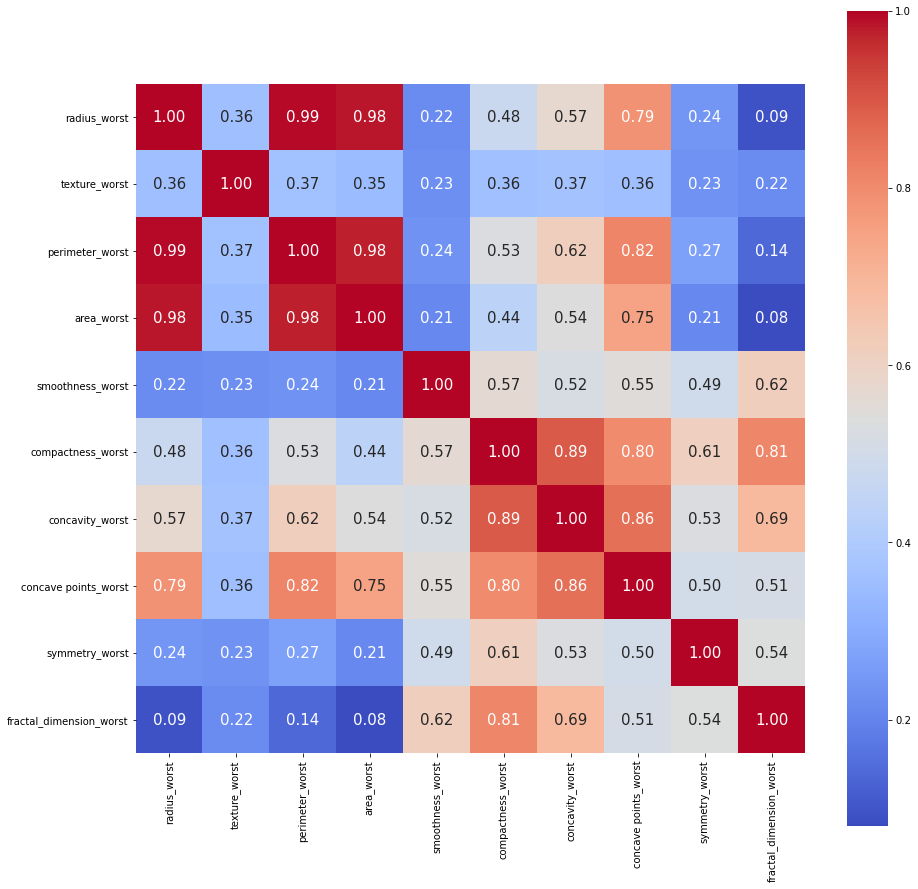

In [10]:
corr=cancer[features_worst].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar = True, square=True, annot = True, fmt = ".2f",\
            annot_kws={'size':15}, xticklabels = features_worst,\
            yticklabels = features_worst, cmap = "coolwarm")
plt.savefig("./images/corr_worst.png")
plt.show()

In [11]:
feature_name=["texture_mean","perimeter_mean","smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean"]
feature_all=["texture_mean","perimeter_mean","smoothness_mean","compactness_mean","symmetry_mean","fractal_dimension_mean",\
             "texture_se","perimeter_se","smoothness_se","compactness_se","symmetry_se","fractal_dimension_se",\
             "texture_worst","perimeter_worst","smoothness_worst","compactness_worst","symmetry_worst","fractal_dimension_worst"]

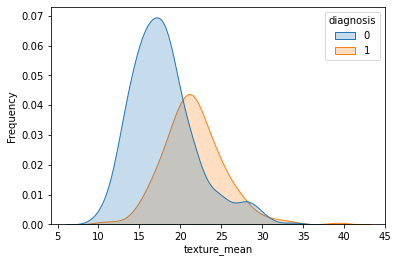

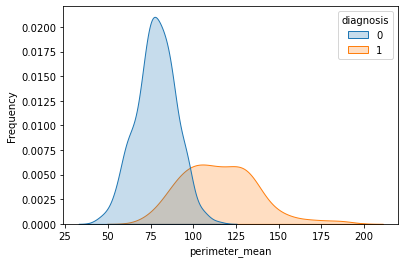

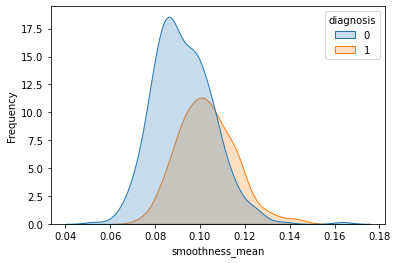

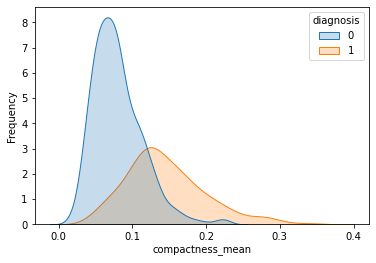

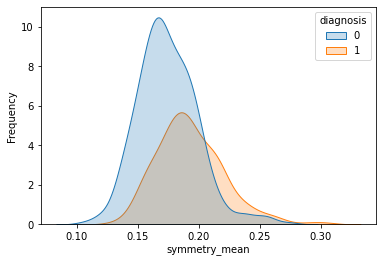

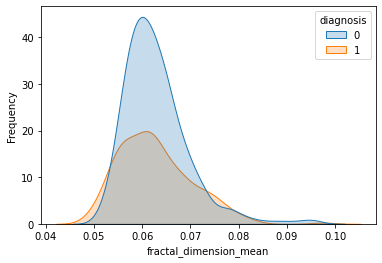

In [12]:
for name in feature_name:
    dist_graph=sns.kdeplot(data=cancer,x=name,hue="diagnosis",shade=True)
    dist_graph.set_xlabel(name)
    dist_graph.set_ylabel("Frequency")
    plt.savefig(f"./images/{name}_plot.png")
    plt.show()

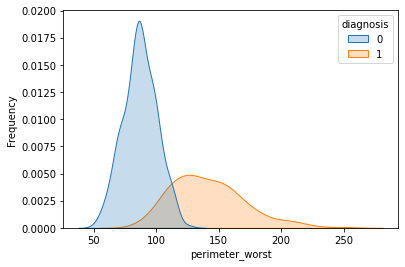

In [13]:
dist_graph=sns.kdeplot(data=cancer,x="perimeter_worst",hue="diagnosis",shade=True)
dist_graph.set_xlabel("perimeter_worst")
dist_graph.set_ylabel("Frequency")
plt.show()

## First try Decision Tree and  Random Forset models with mean subset

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [15]:
target=cancer["diagnosis"]
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [16]:
data=cancer[feature_name]
data.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883


In [17]:
X_train,X_test,y_train,y_test=train_test_split(data, target, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9005847953216374

In [18]:
predictions = clf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(15)

,Prediction,Actual
204,1,0
70,1,1
131,1,1
431,0,0
540,1,0
567,1,1
369,1,1
29,1,1
81,1,0
477,0,0


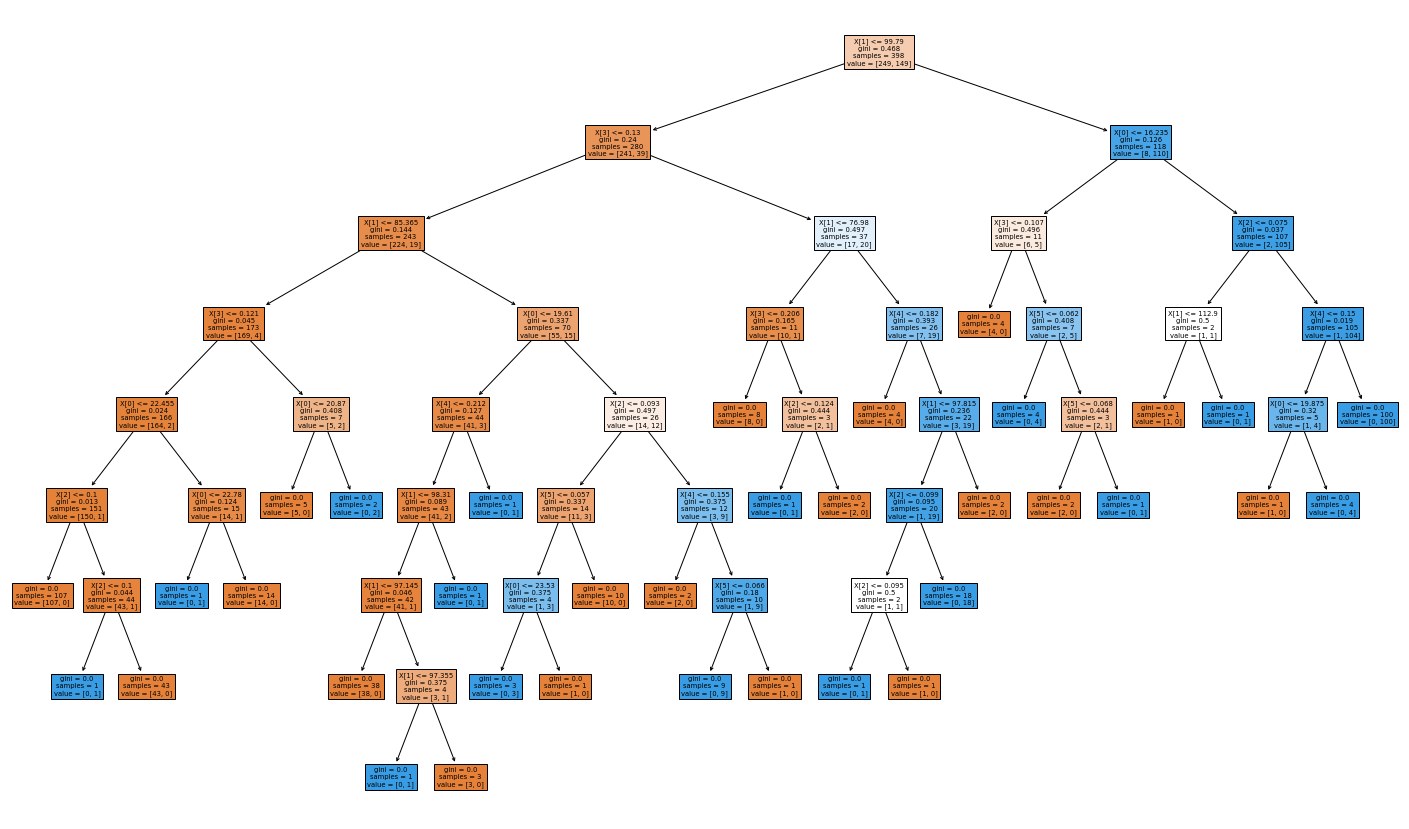

In [19]:
model_all_params = clf
# Prepare a plot figure with set size.
plt.figure(figsize = (25,15))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
tree.plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.savefig("./images/tree_mean.png")
plt.show()

In [20]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9766081871345029

In [21]:
importances = rf.feature_importances_
importances

array([0.14285161, 0.41799271, 0.08981748, 0.20730173, 0.06742358,
       0.07461289])

In [22]:
predictions = rf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(15)

,Prediction,Actual
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
567,1,1
369,1,1
29,1,1
81,0,0
477,0,0


## Decision tree and Random forest for complete feature list

In [23]:
target=cancer["diagnosis"]
data=cancer[feature_all]
data.head()

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.03003,0.006193,17.33,184.60,0.1622,0.6656,0.4601,0.11890
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01389,0.003532,23.41,158.80,0.1238,0.1866,0.2750,0.08902
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.02250,0.004571,25.53,152.50,0.1444,0.4245,0.3613,0.08758
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744,1.1560,3.445,0.009110,0.07458,0.05963,0.009208,26.50,98.87,0.2098,0.8663,0.6638,0.17300
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.01756,0.005115,16.67,152.20,0.1374,0.2050,0.2364,0.07678


In [24]:
X_train,X_test,y_train,y_test=train_test_split(data, target, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9298245614035088

In [25]:
predictions = clf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(15)

,Prediction,Actual
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
567,1,1
369,1,1
29,1,1
81,1,0
477,0,0


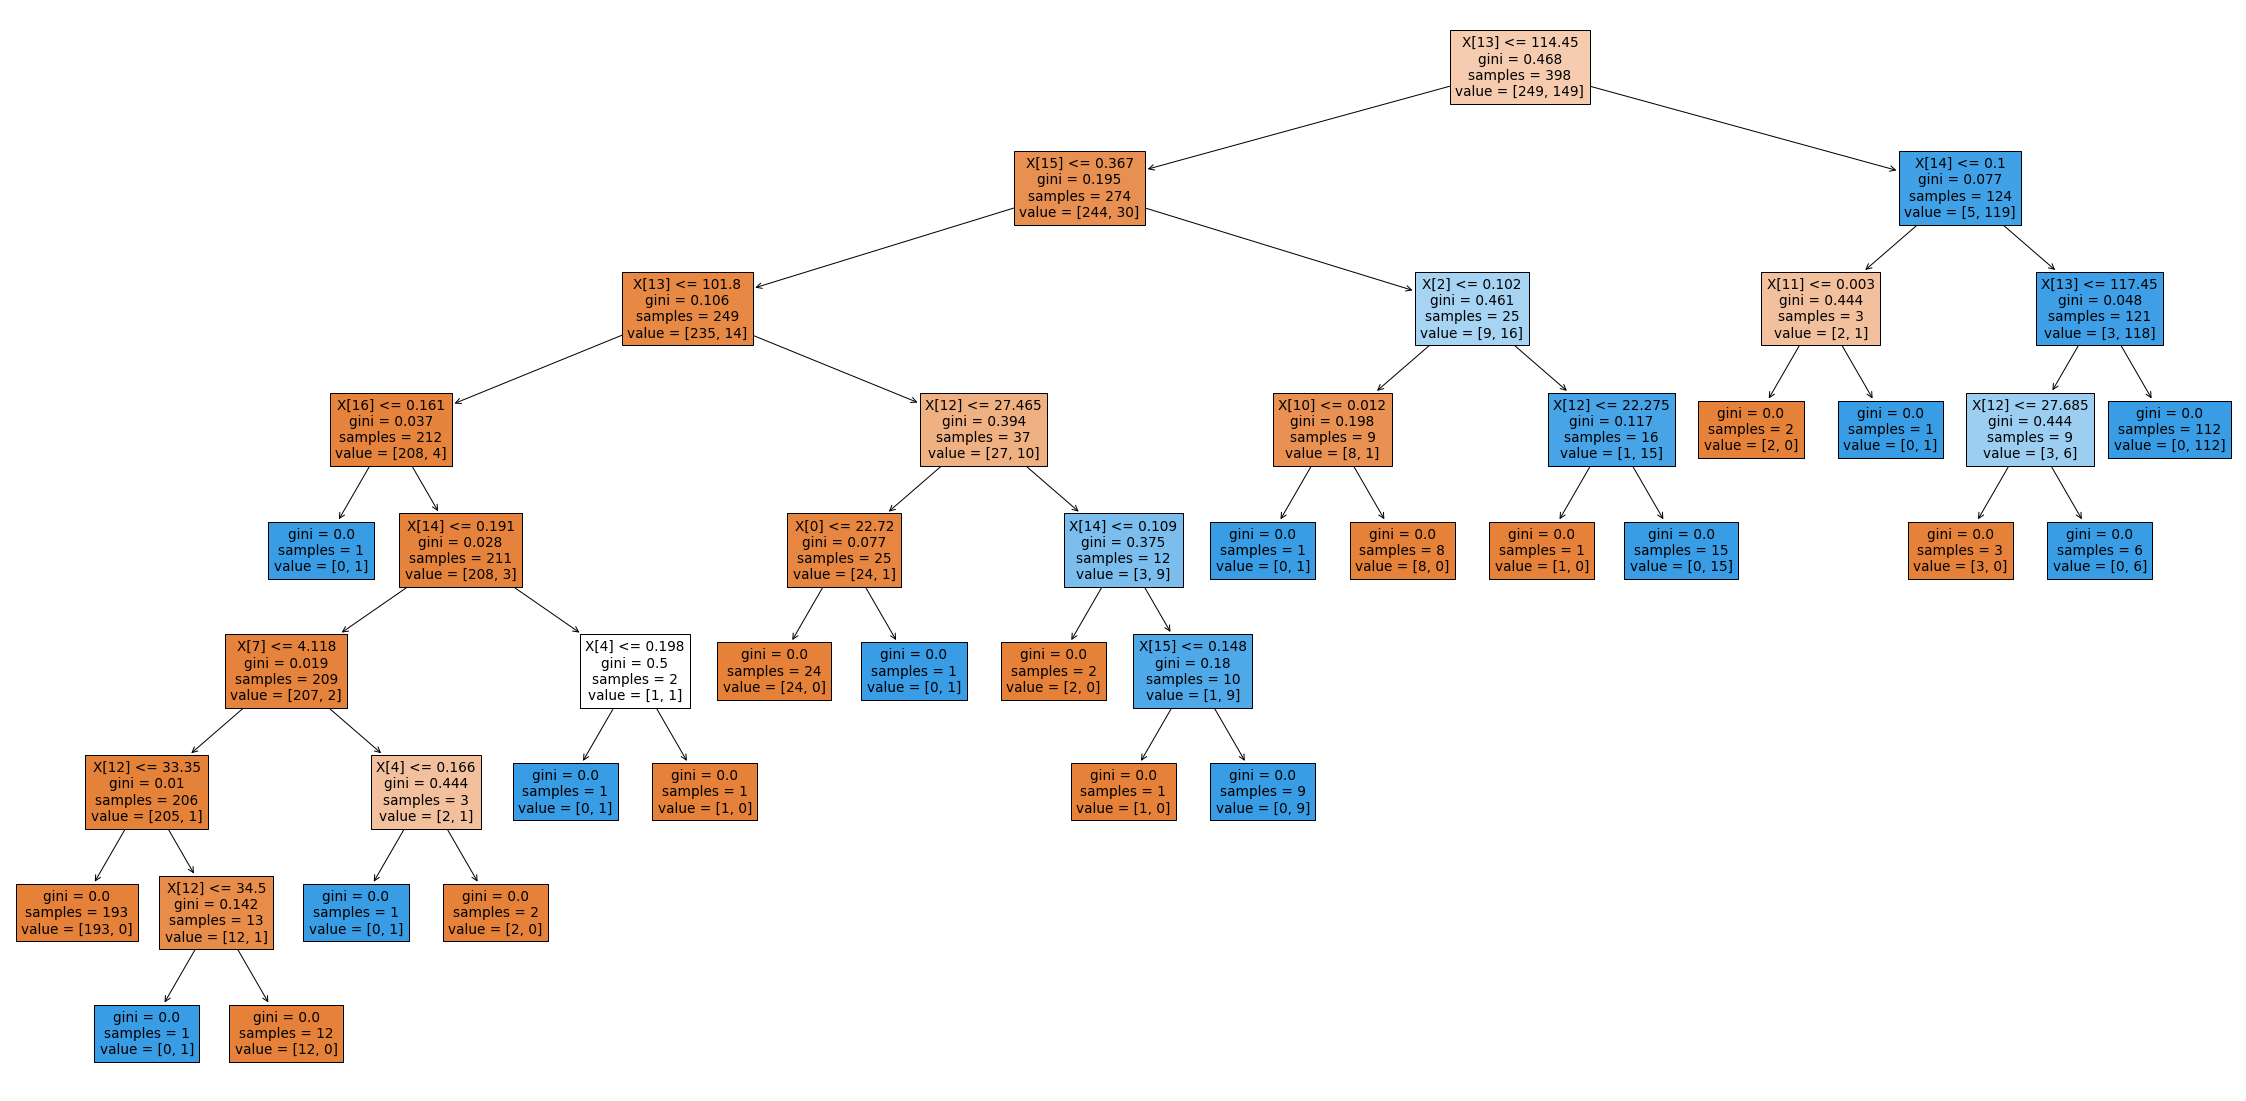

In [39]:
model_all_params = clf
# Prepare a plot figure with set size.
plt.figure(figsize = (40,20))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
tree.plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.savefig("./images/tree_all.png")
plt.show()

In [27]:
feature_all

['texture_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'perimeter_se',
 'smoothness_se',
 'compactness_se',
 'symmetry_se',
 'fractal_dimension_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [28]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9824561403508771

In [29]:
importances = rf.feature_importances_
importances

array([0.03873014, 0.19920894, 0.02053996, 0.06642432, 0.01190479,
       0.01565719, 0.00981391, 0.09276489, 0.00941814, 0.01141711,
       0.01294945, 0.01167824, 0.05507384, 0.27897402, 0.03636746,
       0.07374755, 0.03877927, 0.01655079])

In [30]:
predictions = rf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(15)

,Prediction,Actual
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
567,1,1
369,1,1
29,1,1
81,0,0
477,0,0


### To-do some feature engineering, look into xg boosting

## KNN with mean subset

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [32]:
target=cancer["diagnosis"]
data=cancer[feature_name]

X_train,X_test,y_train,y_test=train_test_split(data, target, test_size=0.3, random_state=42)

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Unscaled Results:
k: 1, Train/Test Score: 1.000/0.930
k: 3, Train/Test Score: 0.922/0.918
k: 5, Train/Test Score: 0.899/0.924
k: 7, Train/Test Score: 0.897/0.924
k: 9, Train/Test Score: 0.894/0.918
k: 11, Train/Test Score: 0.897/0.924
k: 13, Train/Test Score: 0.899/0.918
k: 15, Train/Test Score: 0.894/0.924
k: 17, Train/Test Score: 0.897/0.930
k: 19, Train/Test Score: 0.897/0.936


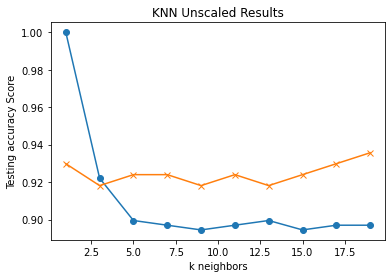

In [33]:
#unscaled results

train_scores=[]
test_scores=[]

print("Unscaled Results:")
for k in range(1,20,2):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    train_score=knn.score(X_train,y_train)
    test_score=knn.score(X_test,y_test)
    
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.title("KNN Unscaled Results")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("./images/knn_unscaled.png")
plt.show()

k: 1, Train/Test Score: 1.000/0.930
k: 3, Train/Test Score: 0.950/0.936
k: 5, Train/Test Score: 0.942/0.936
k: 7, Train/Test Score: 0.942/0.953
k: 9, Train/Test Score: 0.937/0.953
k: 11, Train/Test Score: 0.940/0.942
k: 13, Train/Test Score: 0.932/0.942
k: 15, Train/Test Score: 0.932/0.942
k: 17, Train/Test Score: 0.932/0.965
k: 19, Train/Test Score: 0.930/0.959


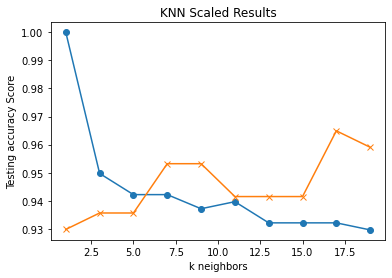

In [34]:
#scaled Results

train_scores=[]
test_scores=[]

for k in range(1,20,2):
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    
    train_score=knn.score(X_train_scaled,y_train)
    test_score=knn.score(X_test_scaled,y_test)
    
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    train_scores.append(train_score)
    test_scores.append(test_score)    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.title("KNN Scaled Results")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig("./images/knn_scaled.png")
plt.show()

Based on the above charts it apears that the best choice for the number gof neighbors would be 7 or 17. I'm going to go with 7.

In [35]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.953


In [36]:
predictions = knn.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(15)

,Prediction,Actual
204,0,0
70,1,1
131,1,1
431,0,0
540,0,0
567,1,1
369,1,1
29,1,1
81,0,0
477,0,0


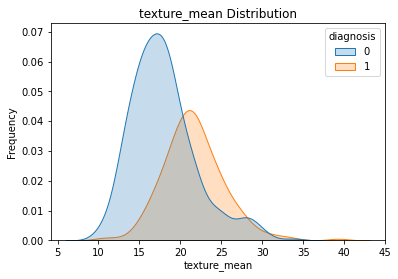

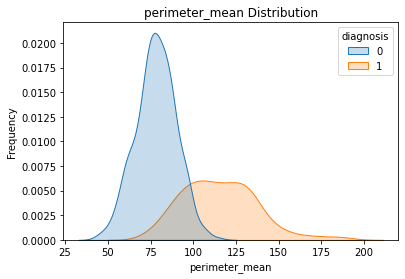

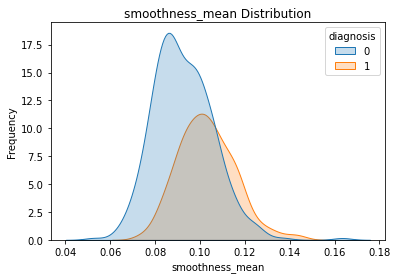

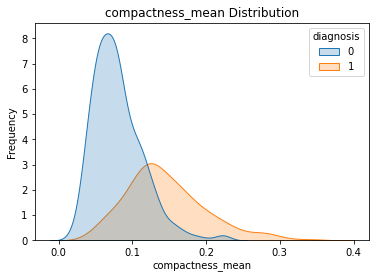

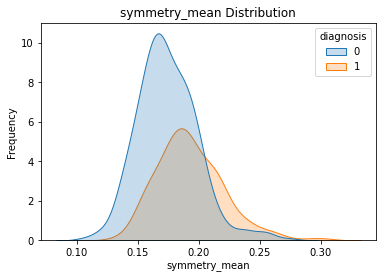

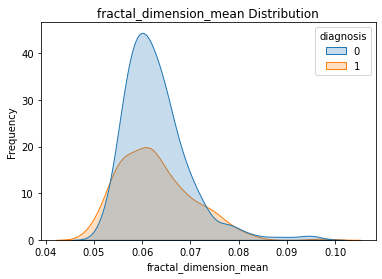

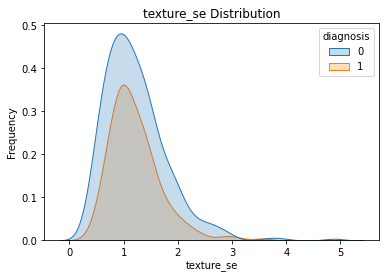

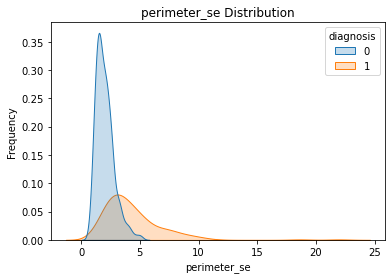

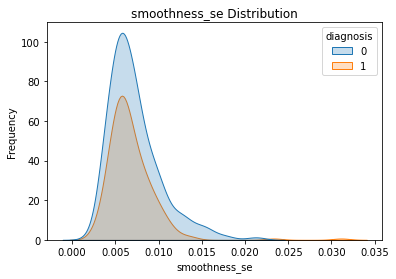

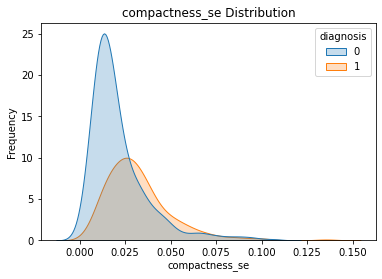

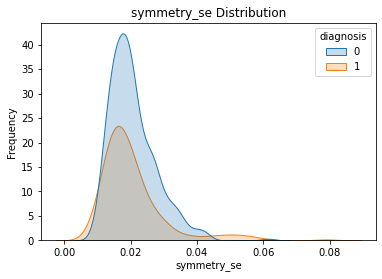

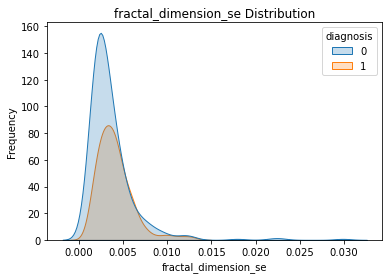

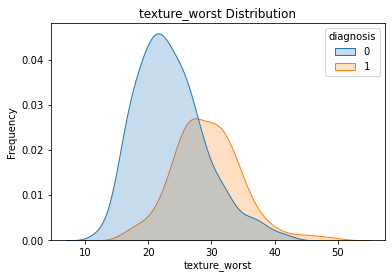

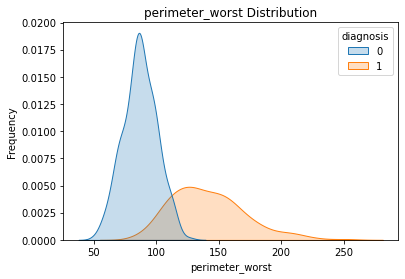

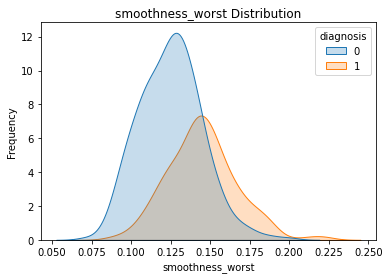

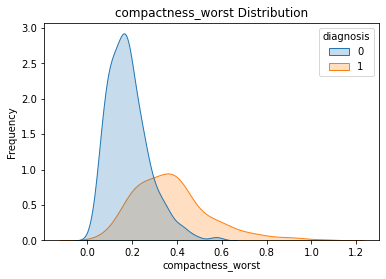

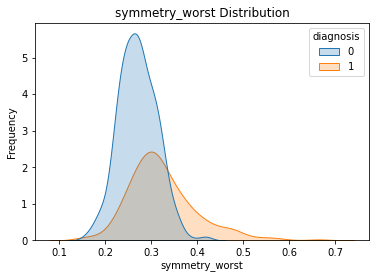

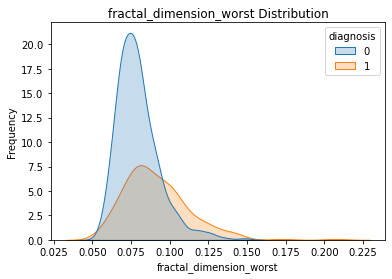

In [38]:
for name in feature_all:
    dist_graph=sns.kdeplot(data=cancer,x=name,hue="diagnosis",shade=True)
    dist_graph.set_xlabel(name)
    dist_graph.set_ylabel("Frequency")
    dist_graph.set_title(f"{name} Distribution")
    plt.savefig(f"./images/{name}_plot.png")
    plt.show()

In [44]:
all_data = pd.read_csv("data.csv")
columns=all_data.columns
i=0
for c in columns:
   
    print(f'var cell{i} = row.append(td);')
    print(f'cell{i}.text(dataRow["{c}"])')
    print('\n')
    i+=1

var cell0 = row.append(td);
cell0.text(dataRow["id"])


var cell1 = row.append(td);
cell1.text(dataRow["diagnosis"])


var cell2 = row.append(td);
cell2.text(dataRow["radius_mean"])


var cell3 = row.append(td);
cell3.text(dataRow["texture_mean"])


var cell4 = row.append(td);
cell4.text(dataRow["perimeter_mean"])


var cell5 = row.append(td);
cell5.text(dataRow["area_mean"])


var cell6 = row.append(td);
cell6.text(dataRow["smoothness_mean"])


var cell7 = row.append(td);
cell7.text(dataRow["compactness_mean"])


var cell8 = row.append(td);
cell8.text(dataRow["concavity_mean"])


var cell9 = row.append(td);
cell9.text(dataRow["concave points_mean"])


var cell10 = row.append(td);
cell10.text(dataRow["symmetry_mean"])


var cell11 = row.append(td);
cell11.text(dataRow["fractal_dimension_mean"])


var cell12 = row.append(td);
cell12.text(dataRow["radius_se"])


var cell13 = row.append(td);
cell13.text(dataRow["texture_se"])


var cell14 = row.append(td);
cell14.text(dataRow["perimeter_s